# KMeans 

steps
1. assign random centroids. must take k as a parameter and only create them within the size of the graph. must also plot them and save their locations for use later
2. iteratively assign the points to the nearest cluster. need a method to calculate distance from the point to each centroid and assign the point to whichever is the closest. replot all of these with colors for each centriod
3. solve for the new centroid using the (x,y) locations of every point assigned to that centroid. 
4. repeat 2-3 until convergence, i.e. need a way of comparing each centroid location and seeing how big the difference is. can also just specify a number of times it runs

1. create data
<br> two guassian distributions at (2, 1) and (7,1)

In [67]:
import numpy as np
import matplotlib.pyplot as plt

PlotSize = 20
k = 2

# Create two gaussian distributions with stddev of 1 at 2,1 and 7,1
# generates 200 samples with 2 elements each (x and y coord)
data = np.random.normal((2,1), 1, (200, 2))

# create a second cluster of datapoints with a 2nd gaussian and 
# append it to the original array of data.
# data is the array, values is a new distribution, appending to x axis
data = np.append(data, np.random.normal((7,1), 1, (200, 2)), axis=0)

# create a single dim classes array with 200 ones and 200 twos
classes = np.repeat(1, 200)
classes = np.append(classes, np.repeat(2, 200), axis = 0)

2. define methods
* twp methods for plotting: one for data points and one for centroids. almost identical, except that data points use the classes list for the color and centroid are just red with different markers and sizes
* zip() pairs up elements from multiple iterables to create tuples based on position (here is making (x,y) pairs for plotting), or unpack a list of tuples to separate lists. syntax is x, y, z = zip(one, two three) for pairing or x, y, z = zip(*list) for unpacking 
* initialize centroids method for creating randomized centroids to start
* distances method to return the cluster closest to a given data point. uses euclidean distance formula:
<br> $$ d = \sqrt{{(x2 - x1)}^2 + {(y2 - y1)}^2}$$
* sort clusters method makes a cluster array that corresponds to the data array by calling the distances method to assign a cluster to each point. this clusters array will contains the index of the closest cluster from the centroids list. this cluster array can then be used as the color when replotting the data
* reassign centroids method goes through the cluster array and sums the x and y data point values for each point in a cluster. it then calculates the new centroid coordinates based on the following and returns a list of the new centroids:
<br> $$ (xbar, ybar) = (\frac{x1 + x2 + ... + xn}{n}, \frac{y1 + y2 + ... + yn}{n})$$
* createPlot method uses plot methods to shortcut making a new plot. uses default value for PlotSize 

In [68]:
# plotting methods: really only needed since I'm creating multiple graphs with the same data/diff centroids
def plotData(data, color):
    # data[:,0] is all x coord values
    # c=classes means the first 200 values will be one color and the next 200 values will be a diff color  
    plt.scatter(data[:,0], data[:,1], c=color)

def plotCentroids(centroids):
    centX, centY = zip(*centroids)
    plt.scatter(centX, centY, s=300, marker='*', c='r')

# initialize random centroids. takes in limits for the random generator based on the biggest values of the
# data -> graph limits
def initializeCentroids(xLim, yLim, k):
    centroids = []
    for i in range(k):
        # random.uniform generates a random float between the specified range (end exclusive)
        centX = np.random.uniform(0, xLim)
        centY = np.random.uniform(0, yLim)
        centroids.append((centX, centY))
    return centroids

# find euclidean distances for each point to each centroid and return index of closest centroid
# takes a single (x,y) data point and the list of centroids (tuples)
def calcDistance(point, centroids):
    distances = []
    for i in range(len(centroids)):
        dist = np.sqrt((point[0] - centroids[i][0])**2 + (point[1] - centroids[i][1])**2) 
        distances.append(dist)

    minIndex = np.argmin(distances)
    return minIndex

def sortClusters(data, centroids):
    # create a cluster array that corresponds to the data array. assign the index of 
    # the nearest centroid to clusters and replot using clusters as color
    clusters = []
    for i in range(len(data)):
        index = calcDistance(data[i], centroids)
        clusters.append(index)

    return clusters

# reassigning centroids based on new clusters
# outer loop goes through the centroids list, and inner loop goes through the clusters list. if the value of the
# clusters array matches the current centroids index, then add that data point to the running sum and increase the 
# number of data points in that cluster by one. after finishing the loops, calculate the new centroid
def reassignCentroids(data, clusters, k):
    newCentroids = []

    for i in range(k):
        sumX = 0; sumY = 0; num = 0
        for j in range(len(data) - 1):
            if clusters[j] == i:
                sumX += data[j][0]
                sumY += data[j][1]
                num += 1
        new = (sumX/num, sumY/num)
        newCentroids.append(new)

    return newCentroids

def createPlot(data, color, centroids, PlotSize = 20):
    plt.figure(figsize = (PlotSize, PlotSize))
    plotData(data, color)
    plotCentroids(centroids)


3. initialize random centroids 
* find centroids limits, generate the centroids, and plot with the data

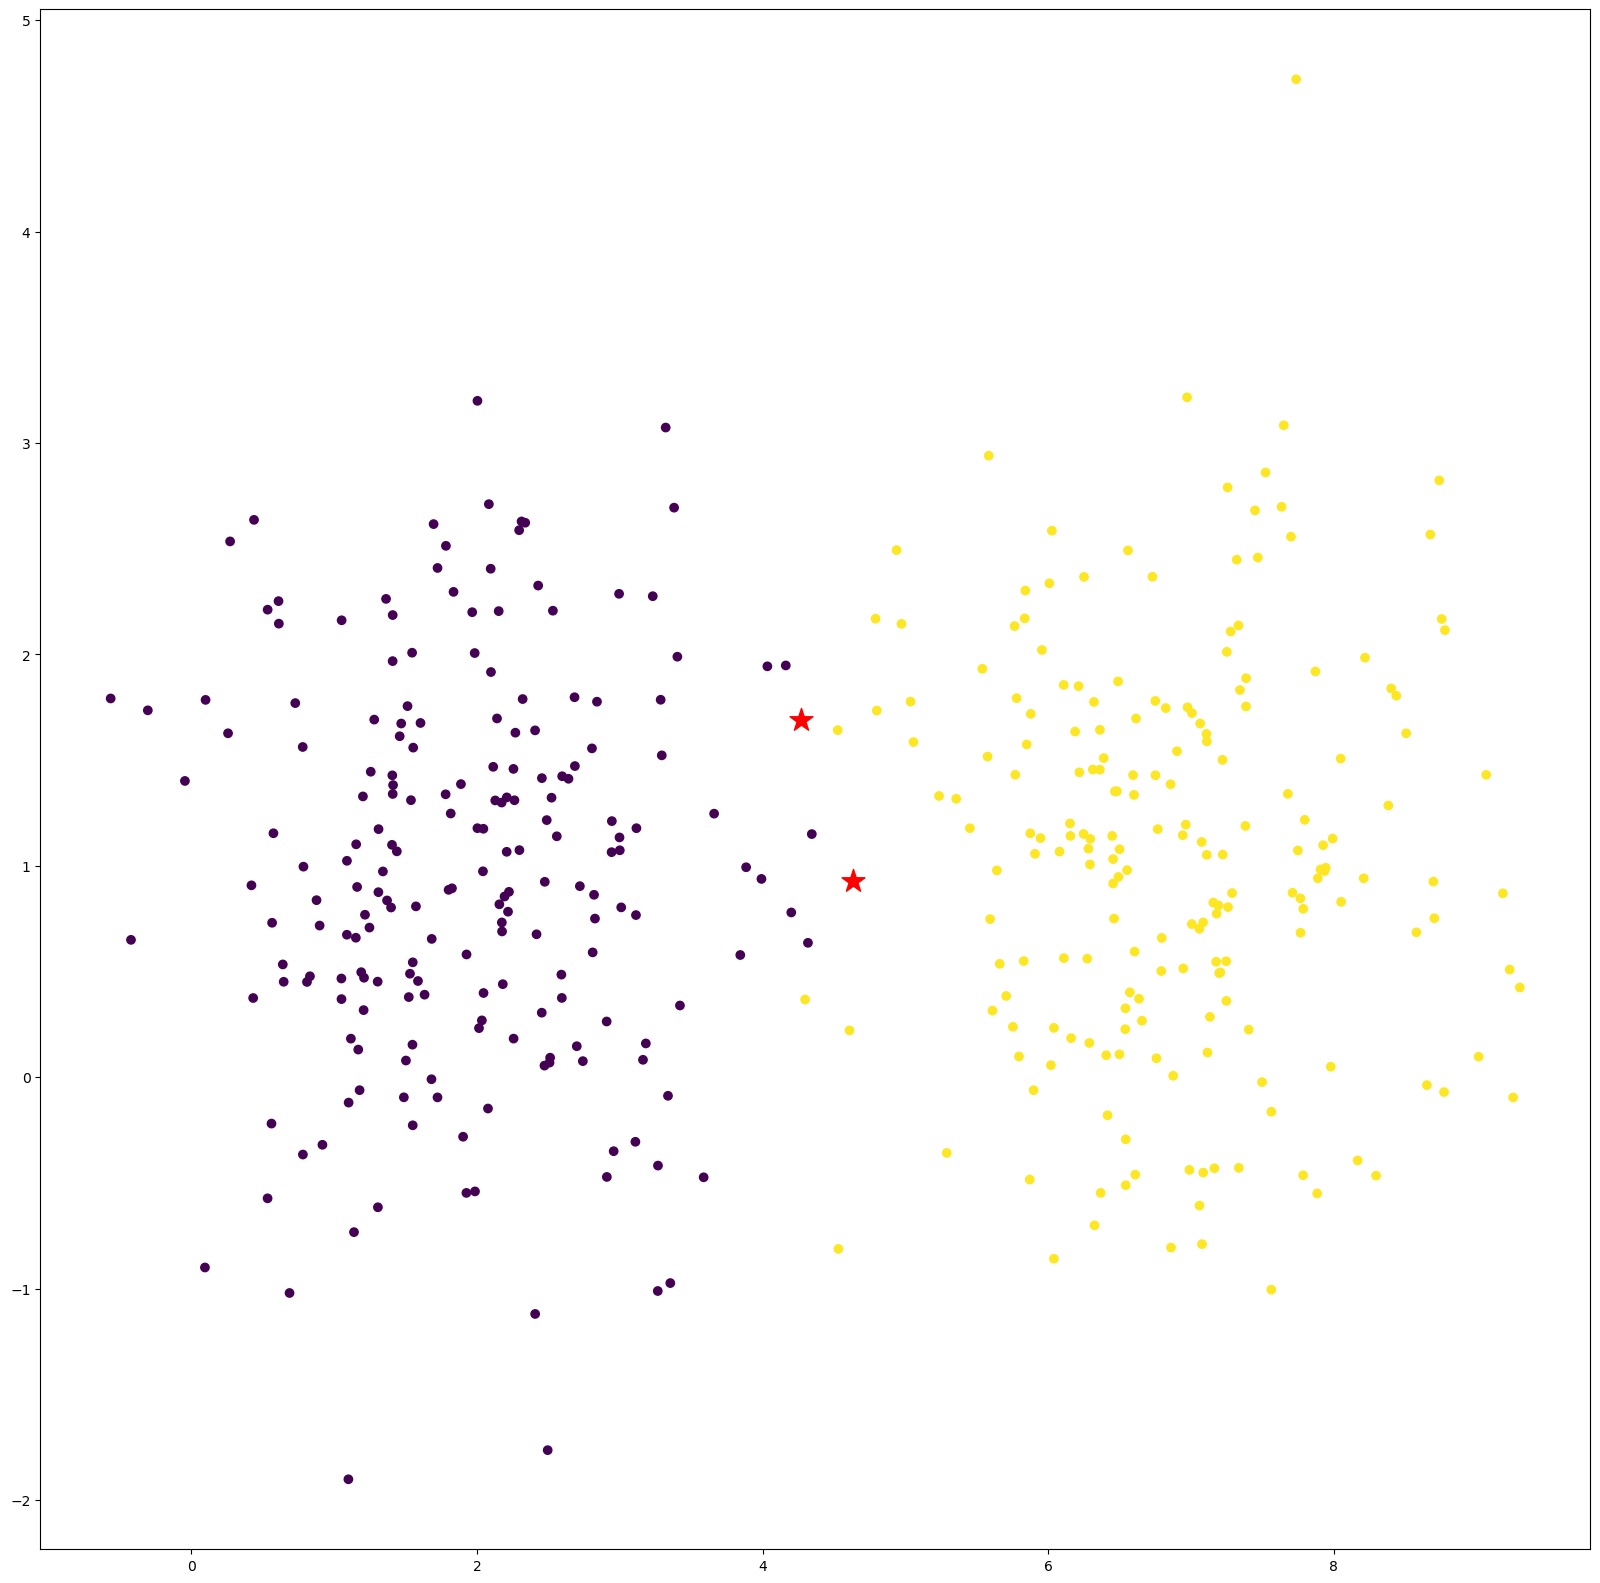

In [69]:
# finding centroid limits based on data and initializing first set of centroids
xMax = max(data[:,0])
yMax = max(data[0,:])
centroids = initializeCentroids(xMax, yMax, k)

# create a new figure and plotting the data and first centroids
createPlot(data, classes, centroids)

4. sort data into clusters based on the original centroids and plot

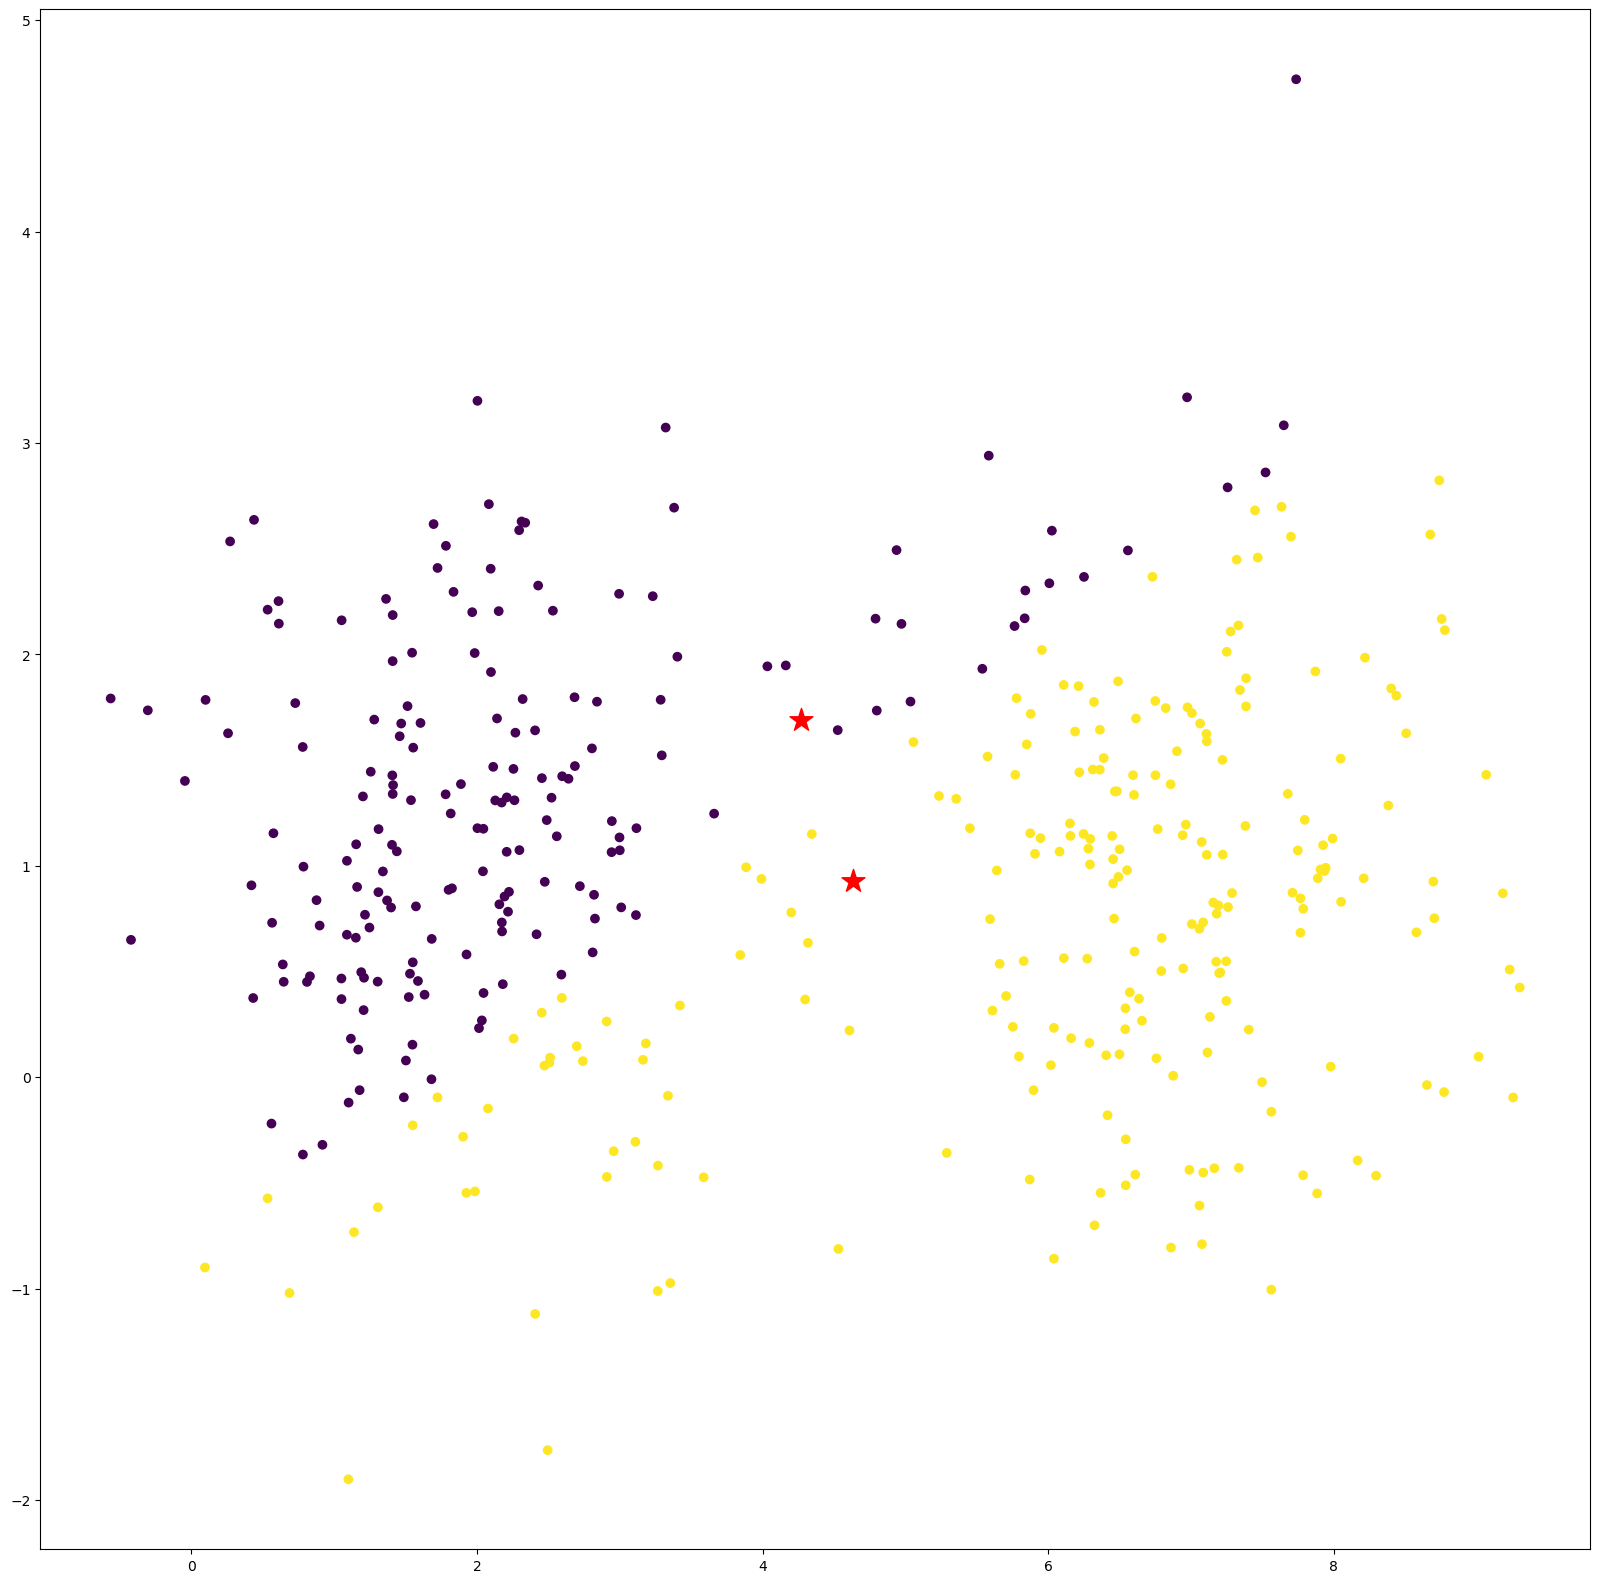

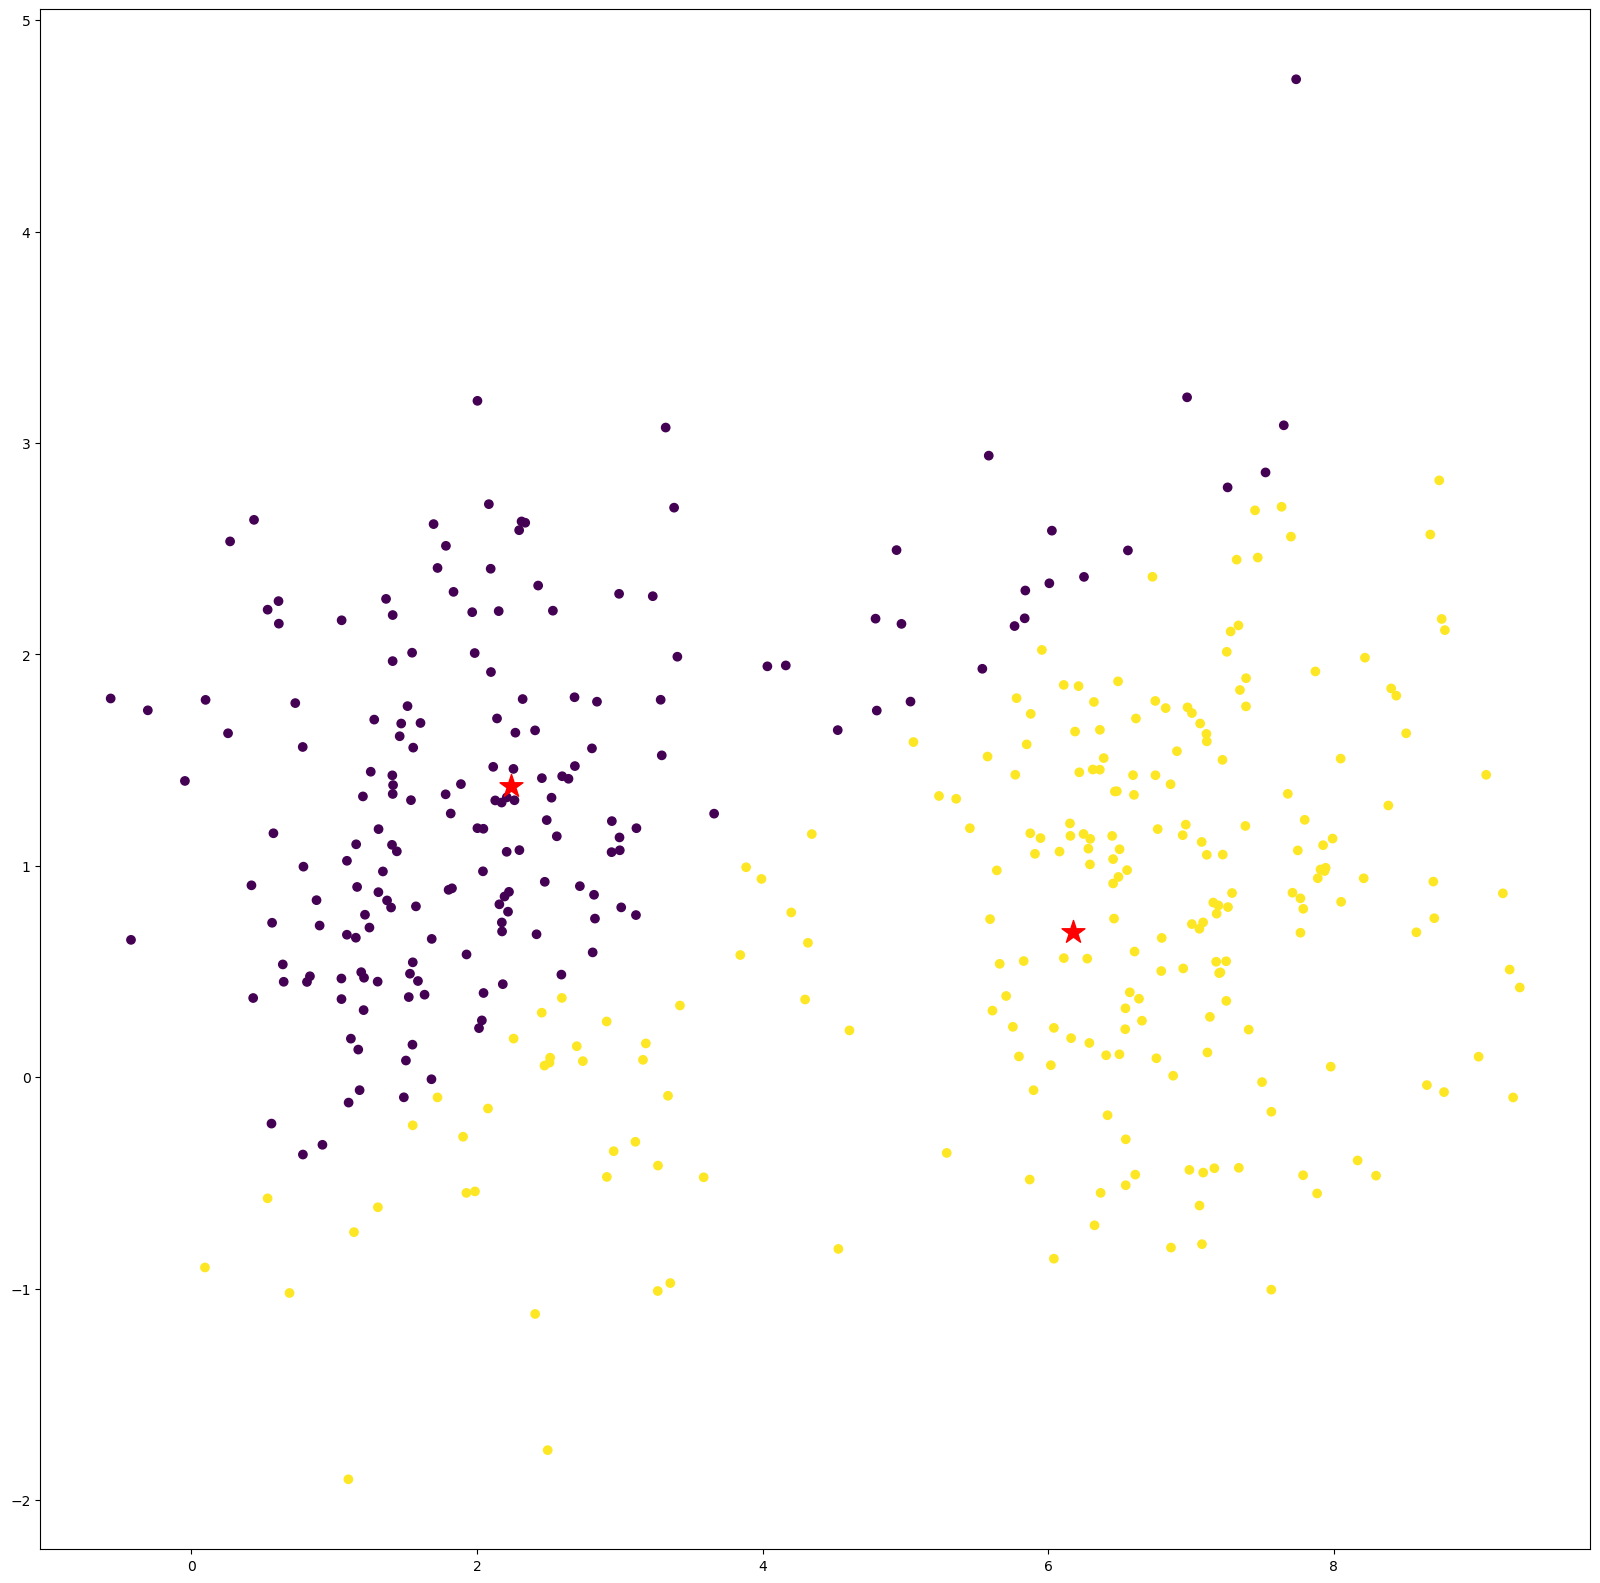

In [70]:
# first cycle: 
# sort clusters and plot with original centroids
r1Clusters = sortClusters(data, centroids)
createPlot(data, r1Clusters, centroids)

# calculate new centroids
r1Centroids = reassignCentroids(data, r1Clusters, k)

# plot with clusters and new centroids!
createPlot(data, r1Clusters, r1Centroids)

5. repeat clustering and recalculating!

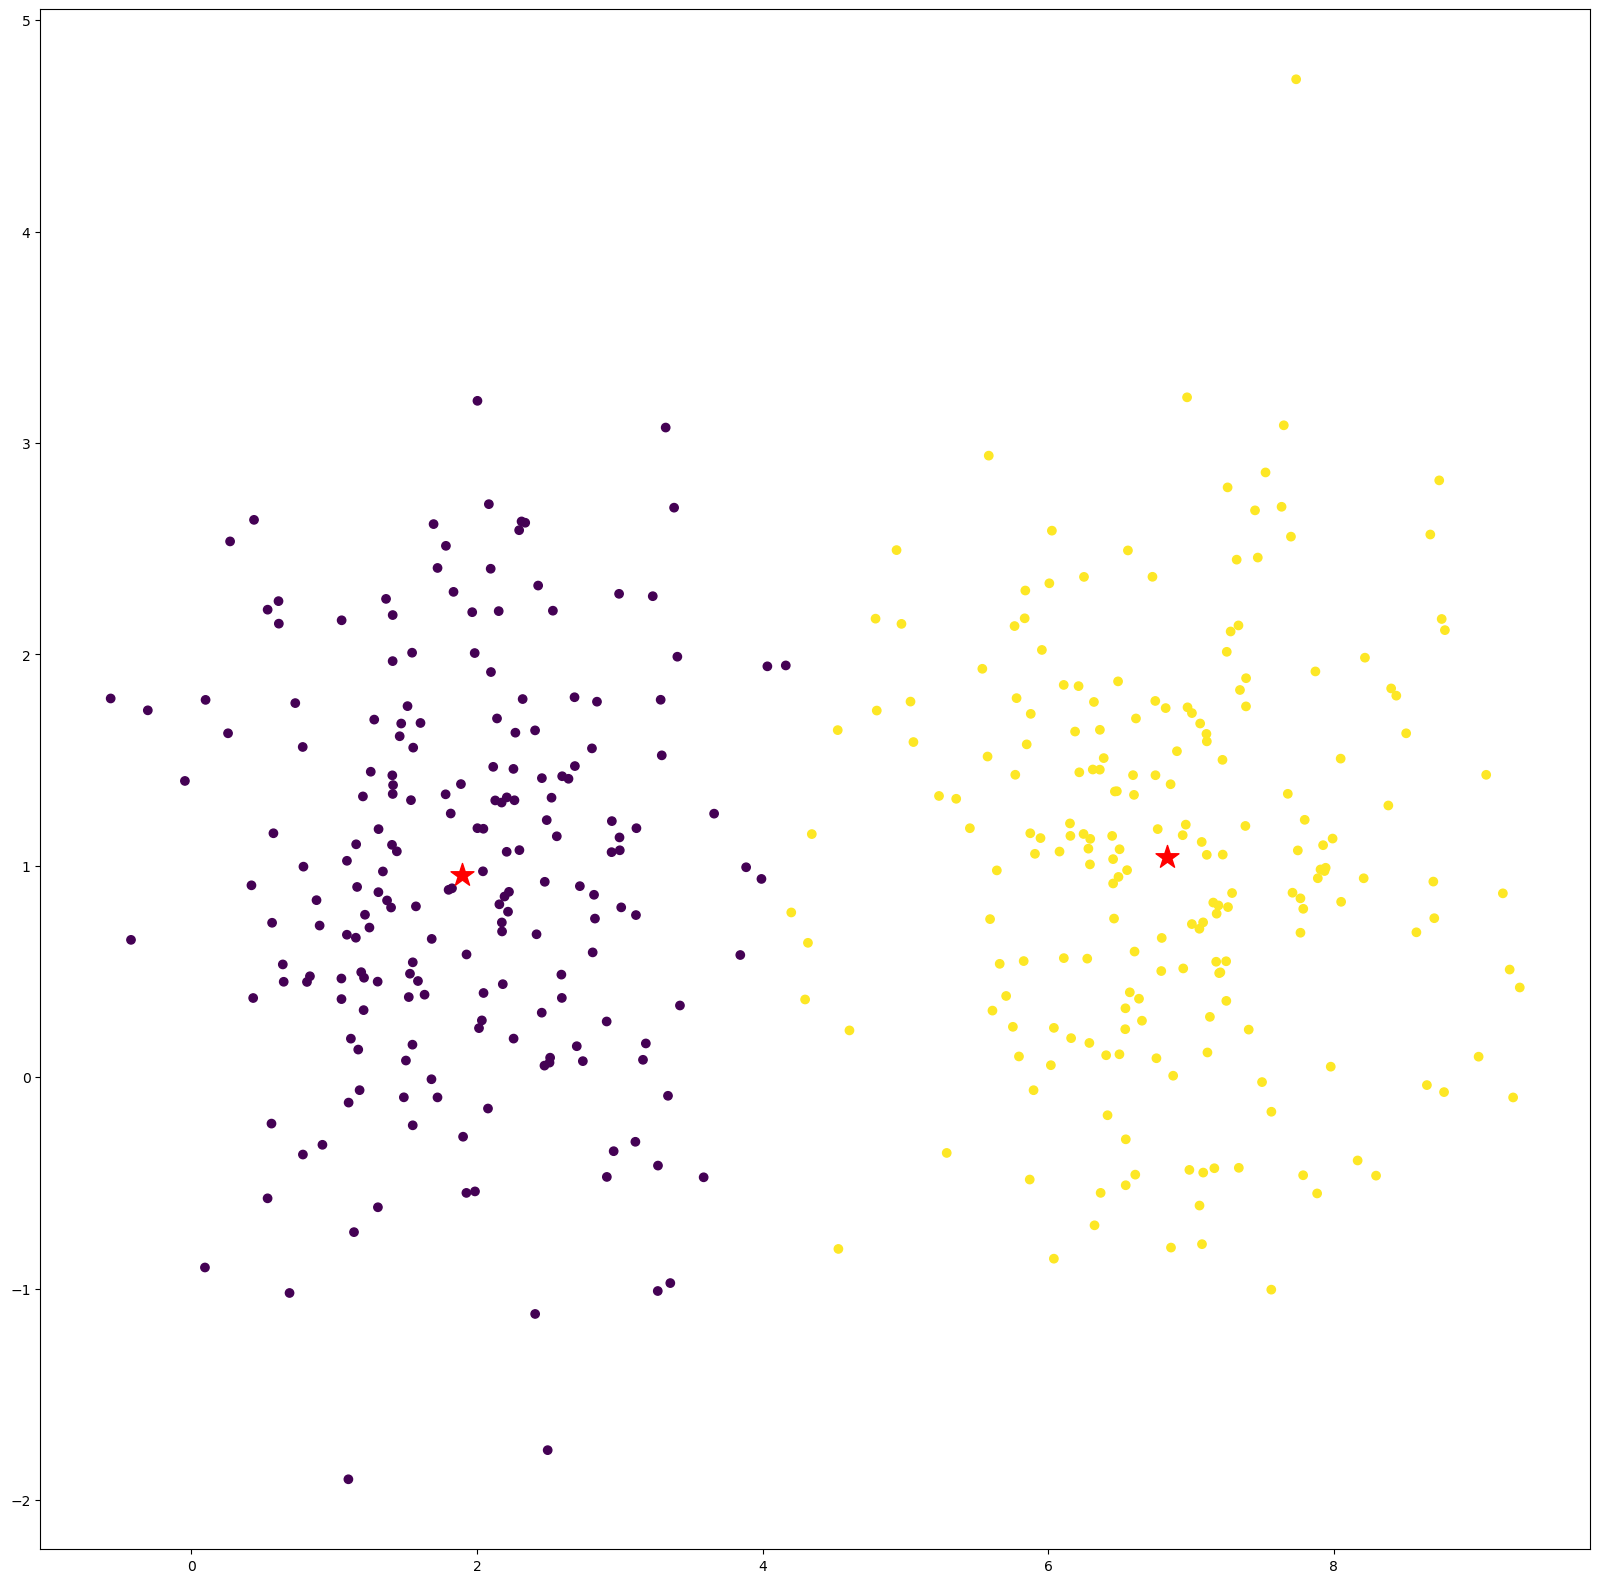

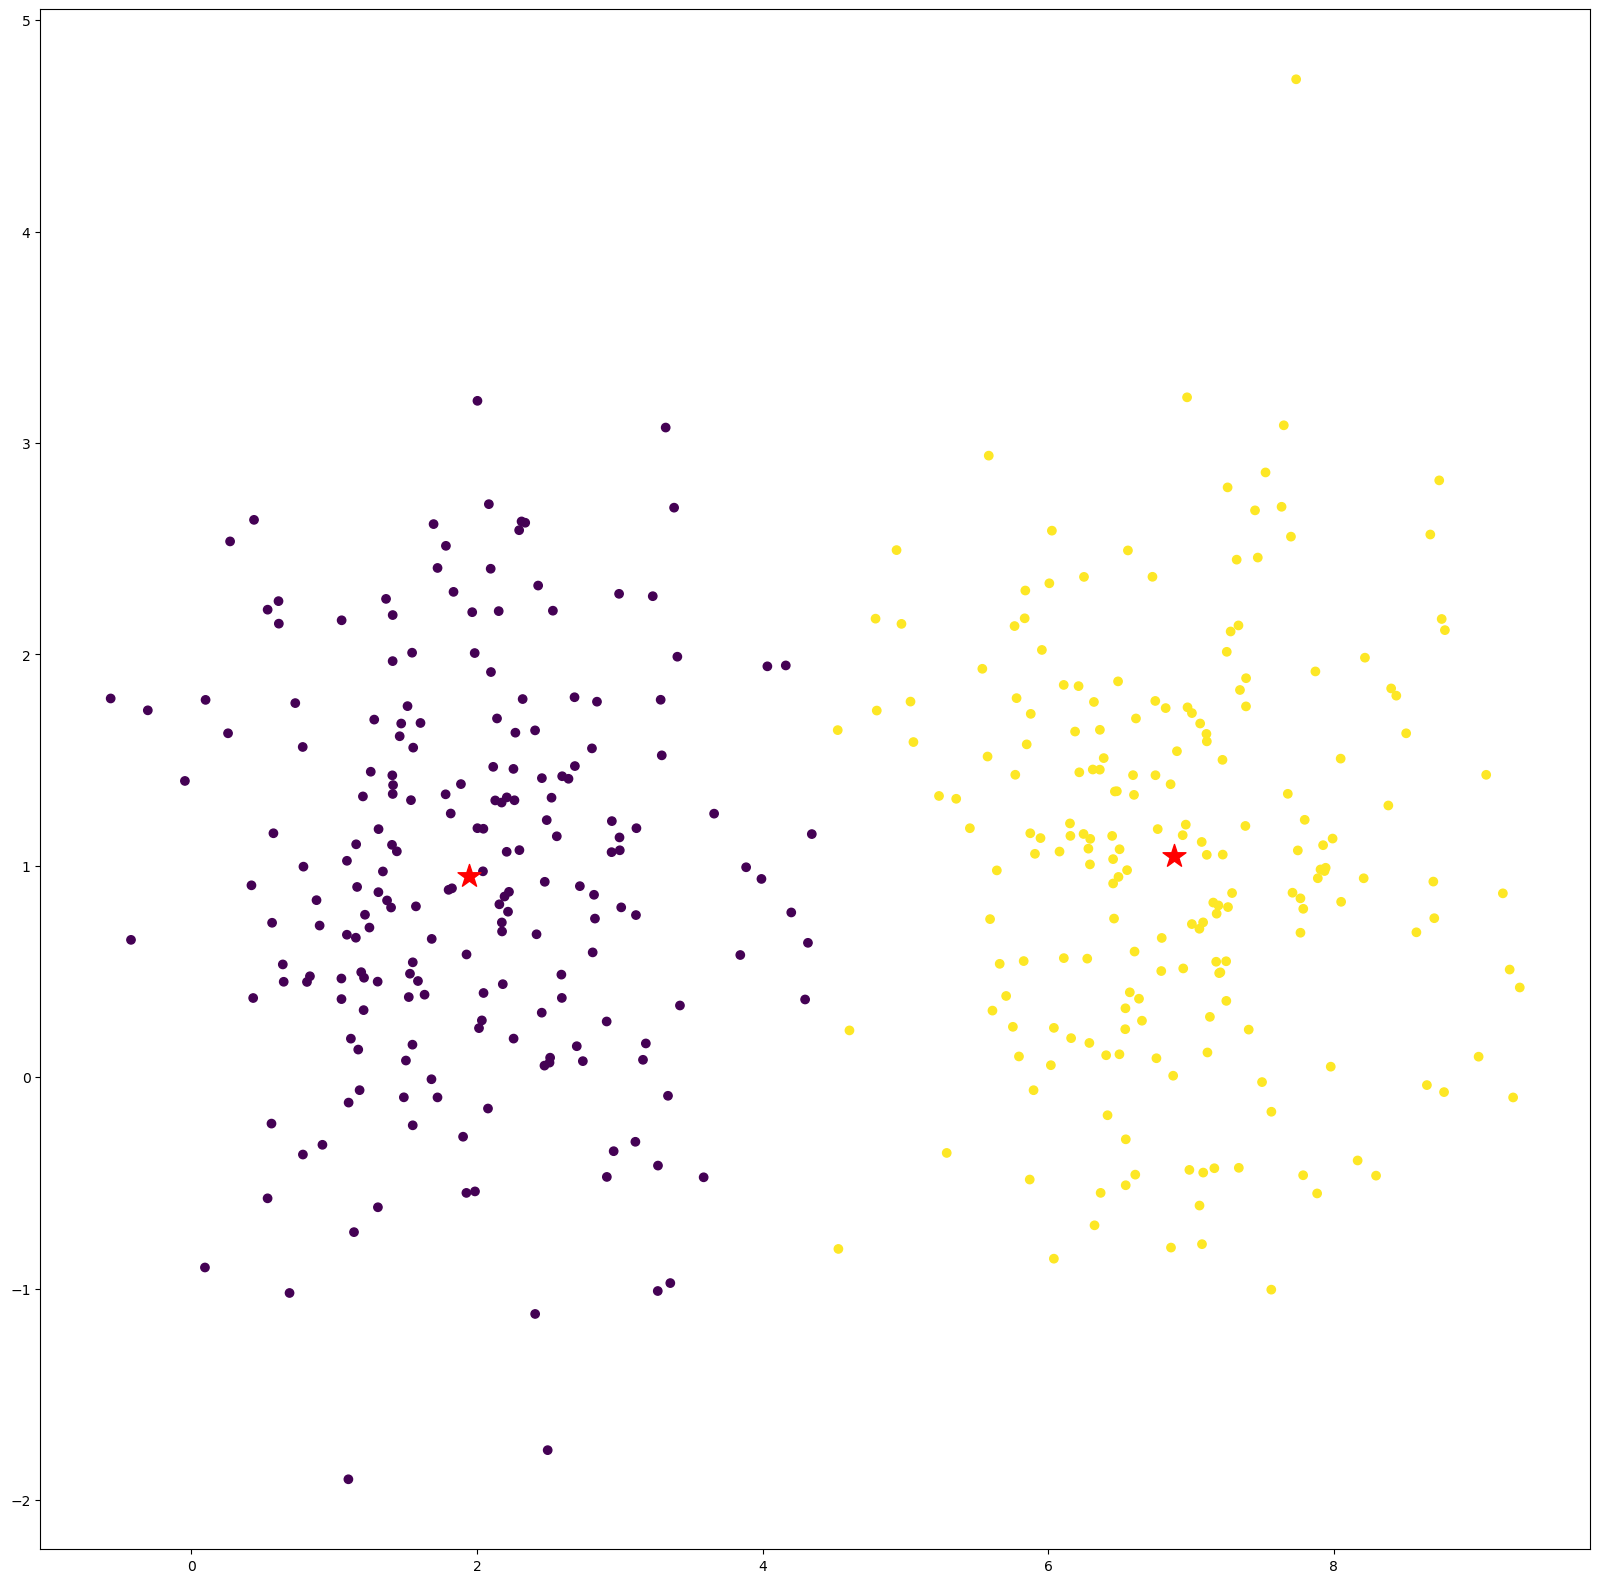

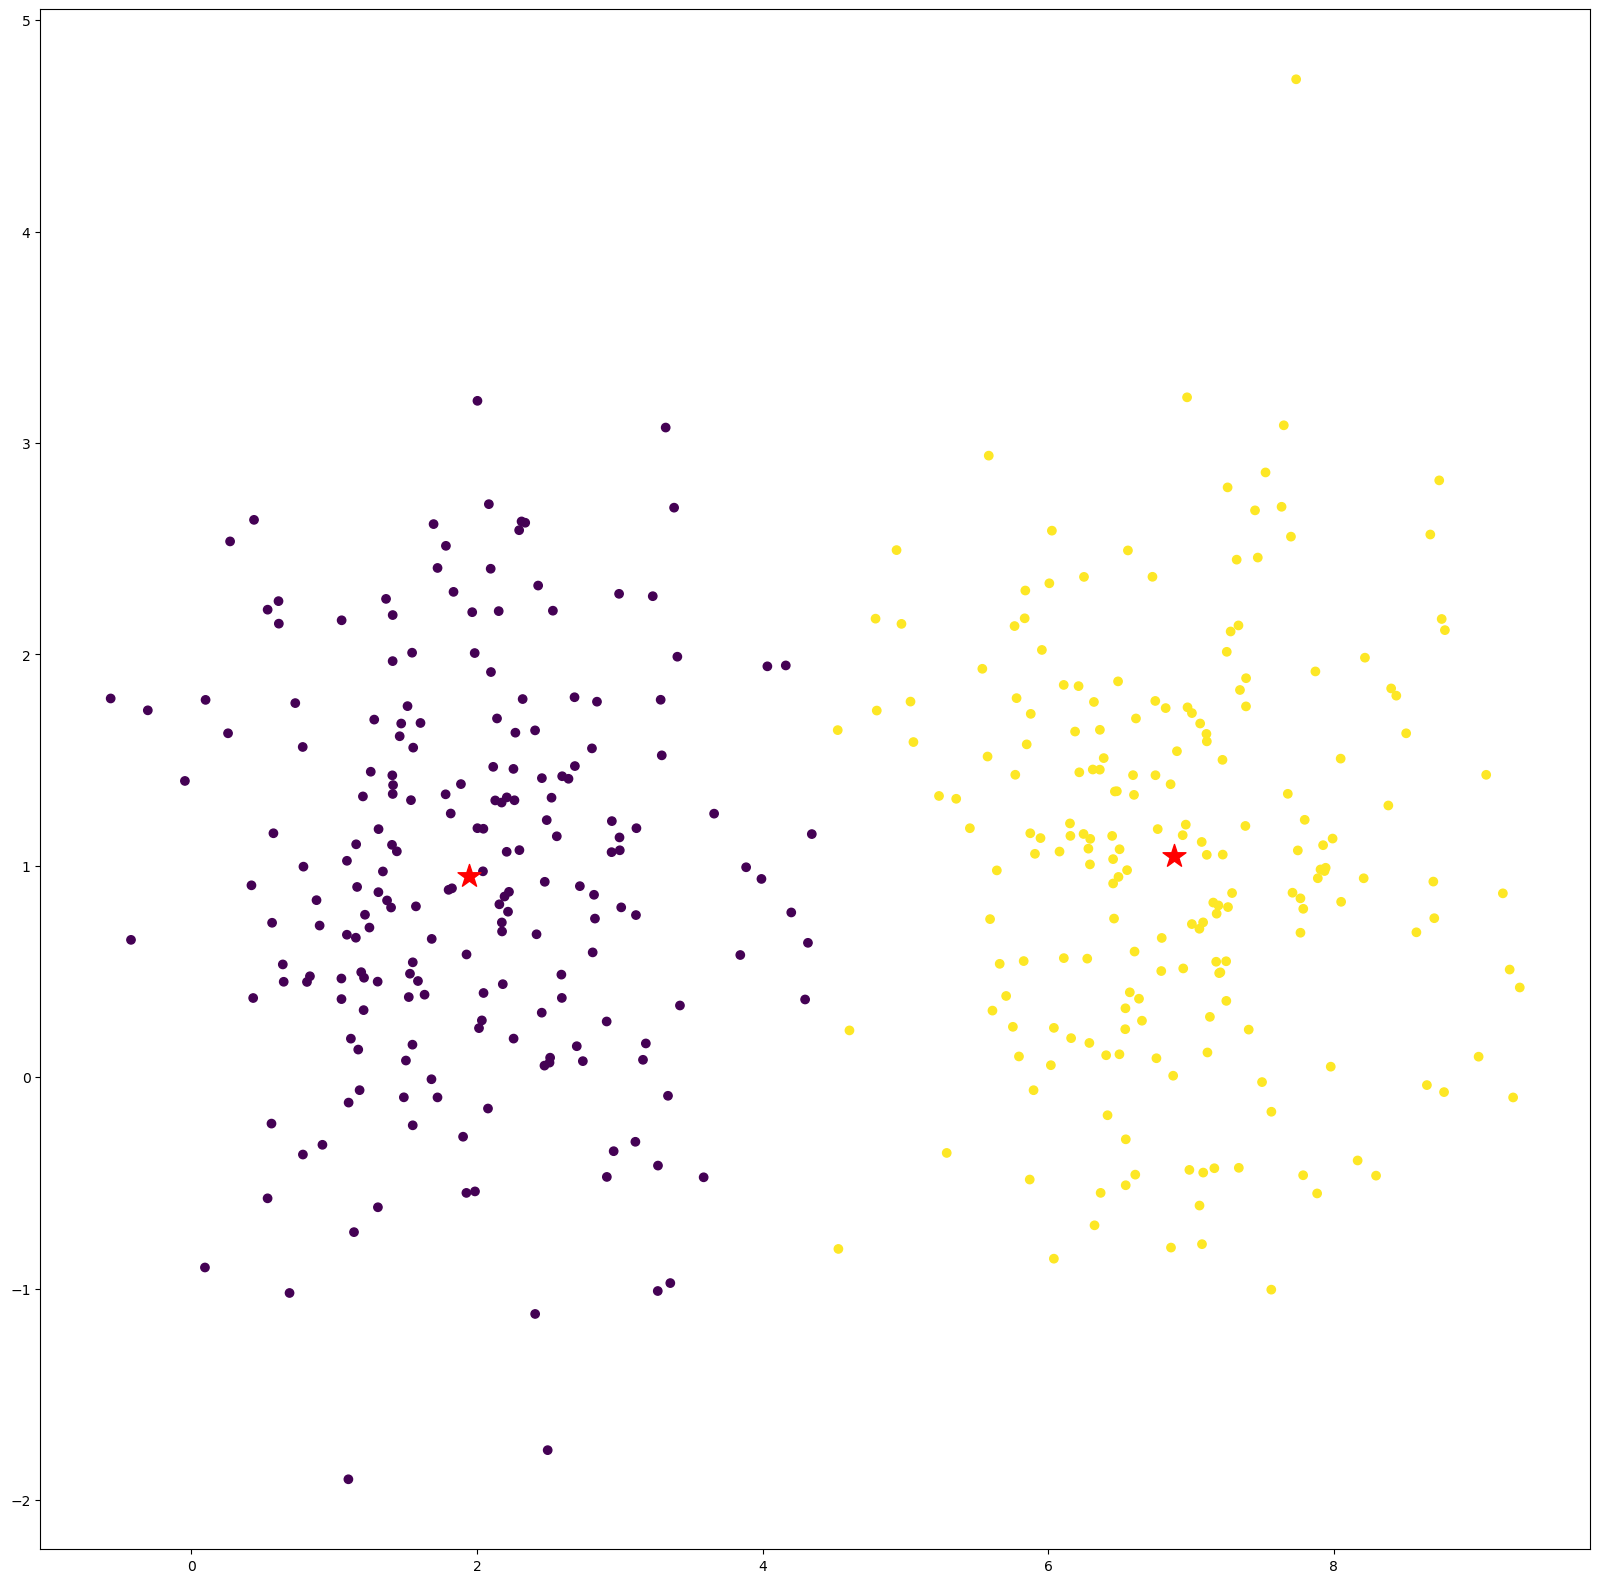

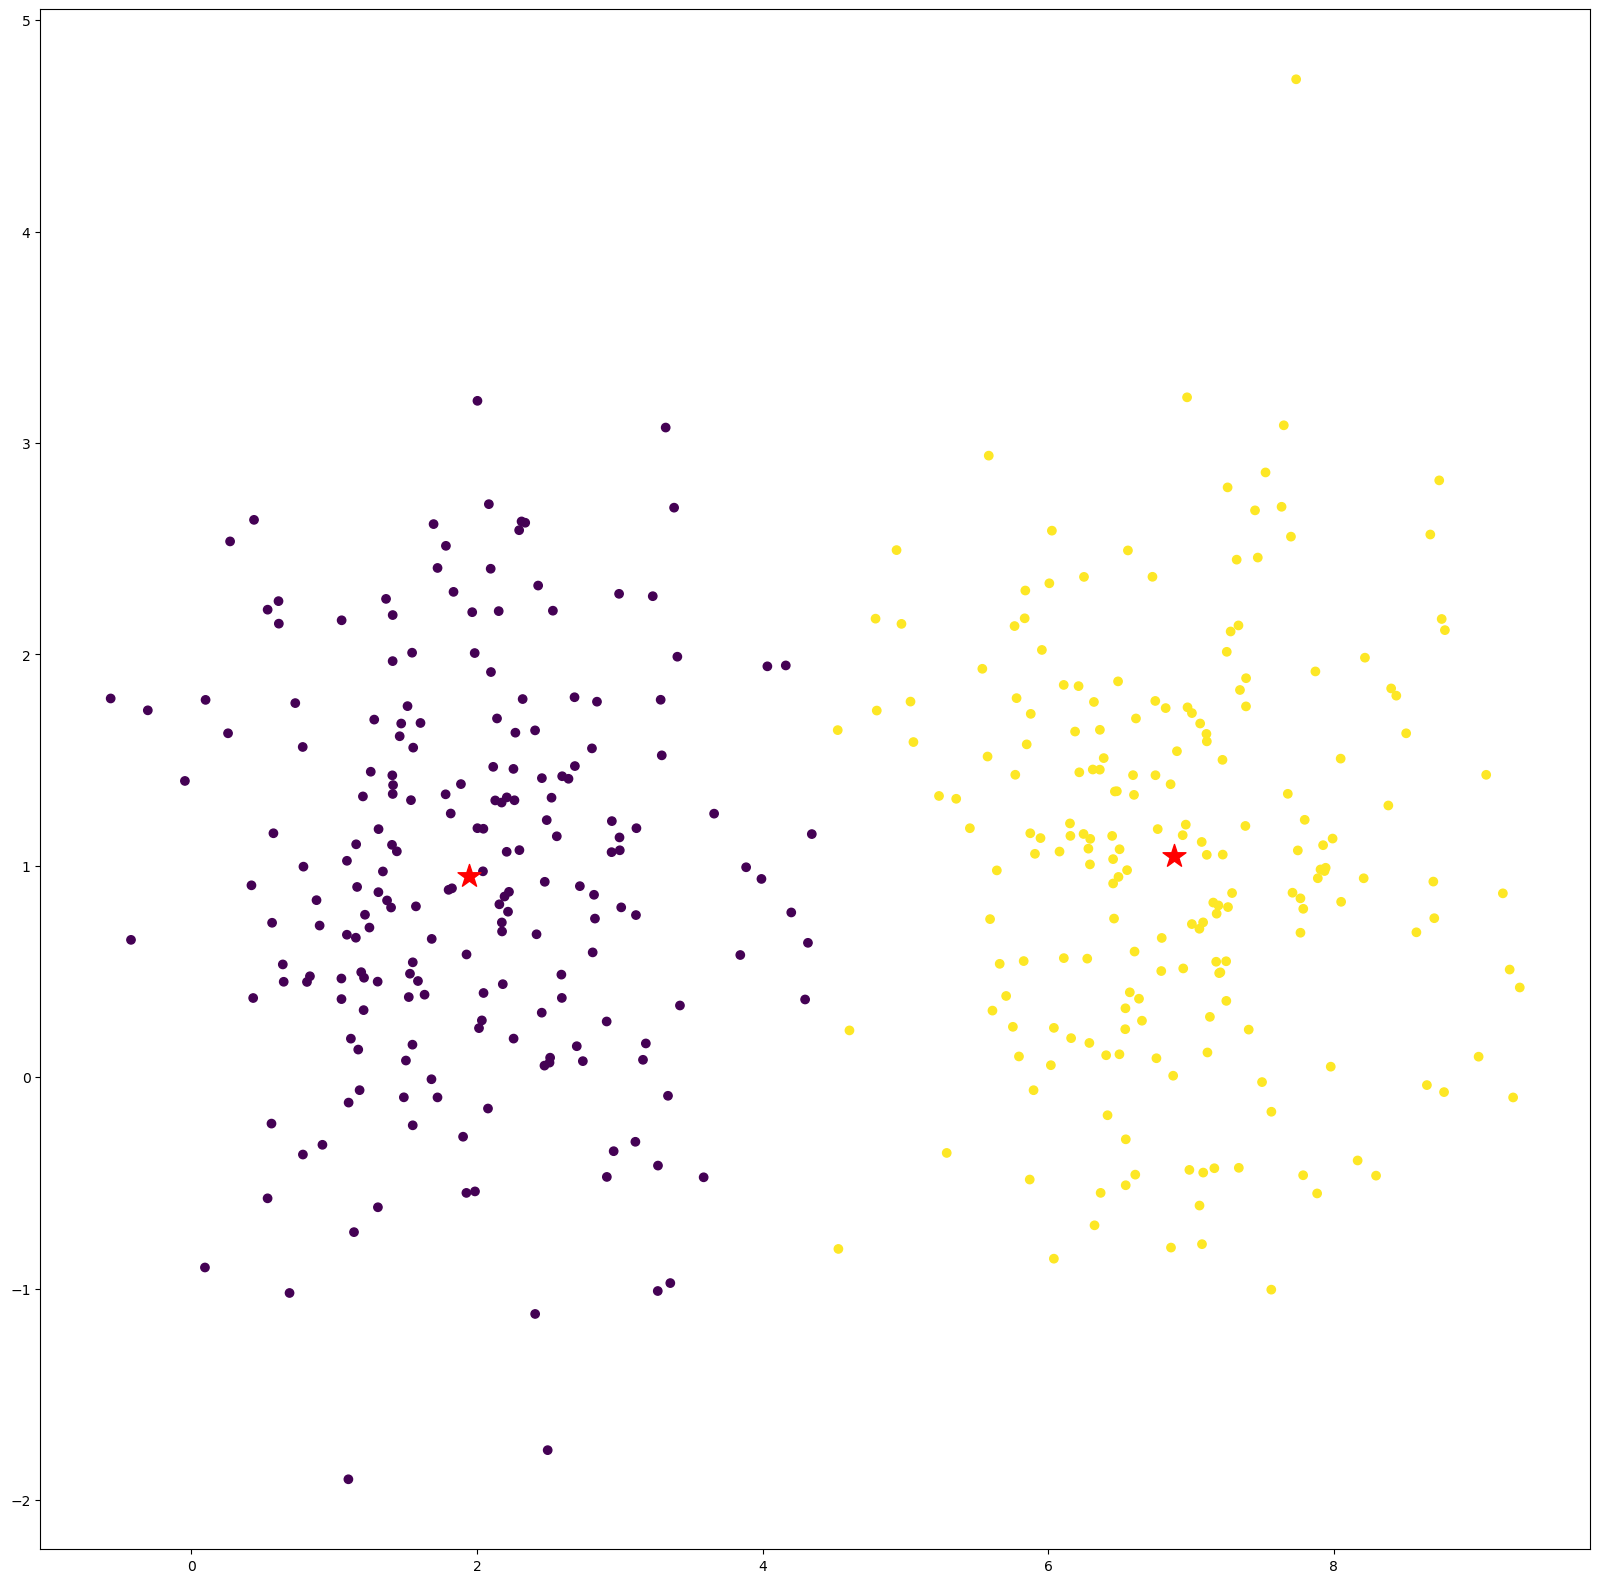

In [71]:
# REPEAT!!!
r2Clusters = sortClusters(data, r1Centroids)
r2Centroids = reassignCentroids(data, r2Clusters, k)
createPlot(data, r2Clusters, r2Centroids)

r3Clusters = sortClusters(data, r2Centroids)
r3Centroids = reassignCentroids(data, r3Clusters, k)
createPlot(data, r3Clusters, r3Centroids)

r4Clusters = sortClusters(data, r3Centroids)
r4Centroids = reassignCentroids(data, r3Clusters, k)
createPlot(data, r4Clusters, r4Centroids)

r5Clusters = sortClusters(data, r4Centroids)
r5Centroids = reassignCentroids(data, r4Clusters, k)
createPlot(data, r5Clusters, r5Centroids)